# FreeCodeCamp practice 3: Medical data visualizer

Original link: https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/demographic-data-analyzer

For some (technical) reason, code files in Replit did not work so I solved the problem in my personal notebook and then pushed it to my github repository.

# My answers

In [1]:
# medical data visualizer from FreeCodeCamp
# 11.01.2023
# Ada Kim
# *The code blocks in the notebook are not a finalized version -
# I leave it to look at how they had been debugged over 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#import data

df = pd.read_csv('medical_examination.csv')

In [2]:
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df['overweight'] = round(df['weight']/((df['height']/100)**2),0)
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,35.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,24.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,29.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0


In [4]:
# Add 'overweight' column

#To determine if a person is overweight, 
#first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. 
#If that value is > 25 then the person is overweight. 
#Use the value 0 for NOT overweight and the value 1 for overweight.

df['BMI'] = round(df['weight']/((df['height']/100)**2),0)
df['overweight'] = np.where(df['BMI'] > 25, 1, 0)
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0,22.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1,35.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0,24.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1,29.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0,23.0


In [5]:
# Normalize data by making 0 always good and 1 always bad. 
#If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df[['cholesterol','gluc']] = df[['cholesterol','gluc']].applymap(lambda x: 1 if x > 1 else 0)

In [6]:
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,BMI
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0,22.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1,35.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0,24.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1,29.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0,23.0


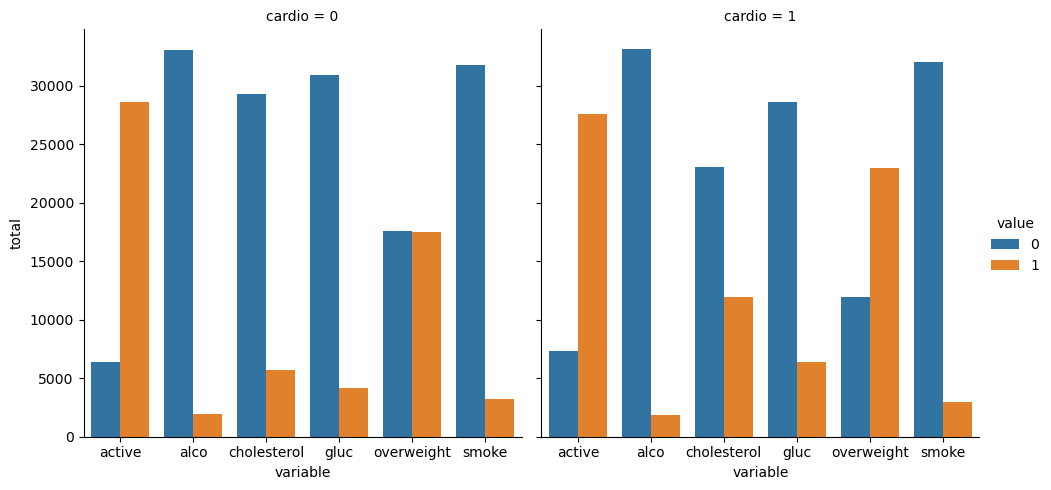

In [7]:
df_cat = df[['cholesterol','gluc','smoke','alco','active','overweight','cardio']]
df_cat = pd.melt(df_cat, id_vars = ['cardio'], var_name = 'variable', value_name = 'value')
df_cat = df_cat.groupby(['cardio','variable','value']).size().reset_index(name='total')
g = sns.catplot(x="variable", y='total', hue='value', data=df_cat, kind='bar', col='cardio', legend='True')
#df_cat

In [8]:
#Convert the data into long format and create a chart 
#that shows the value counts of the categorical features using seaborn's catplot(). 
#The dataset should be split by 'Cardio' so there is one chart for each cardio value. 
#The chart should look like examples/Figure_1.png.

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = df[['cholesterol','gluc','smoke','alco','active','overweight','cardio']]


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = pd.melt[df_cat, id_vars == ['cardio'], var_name == 'variable', value_name == 'value']
    

    # Draw the catplot with 'sns.catplot()'
    df_cat = df_cat.groupby(['cardio','variable','value']).size().reset_index(name='total')


    # Get the figure for the output
    fig = sns.catplot(x='variable', y='total', hue='value', data=df_cat, kind='bar', col='cardio', legend='True').fig
    

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

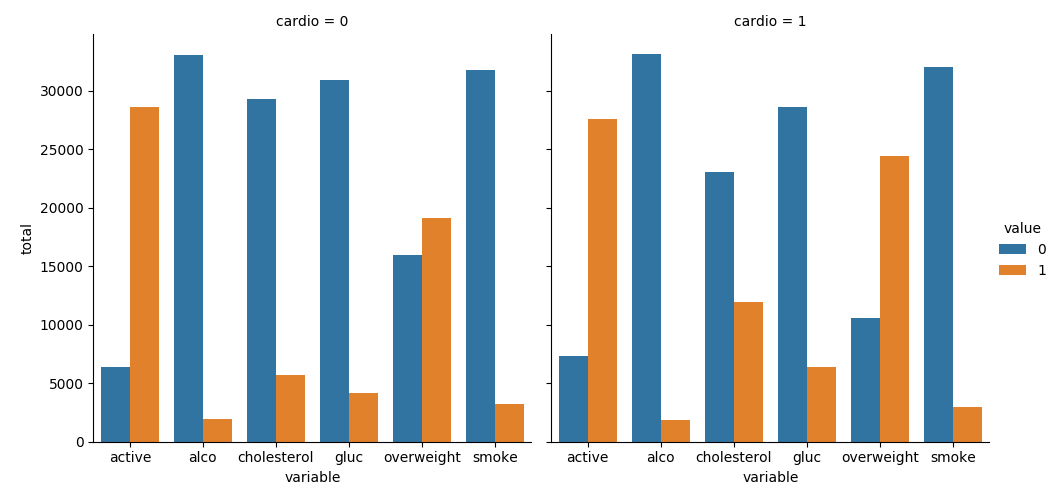

In [9]:
#Clean the data. Filter out the following patient segments that represent incorrect data:

#diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
clean_df = df[df['ap_lo'] <= df['ap_hi']]
clean_df = clean_df.drop('BMI', axis=1)

#height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
#height is more than the 97.5th percentile
#weight is less than the 2.5th percentile
#weight is more than the 97.5th percentile

clean_df = clean_df[(clean_df['height'] >= clean_df['height'].quantile(0.025)) \
                    &(clean_df['height'] <= clean_df['height'].quantile(0.975))]

clean_df = clean_df[(clean_df['weight'] >= clean_df['weight'].quantile(0.025)) \
                    &(clean_df['weight'] <= clean_df['weight'].quantile(0.975))]

clean_df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


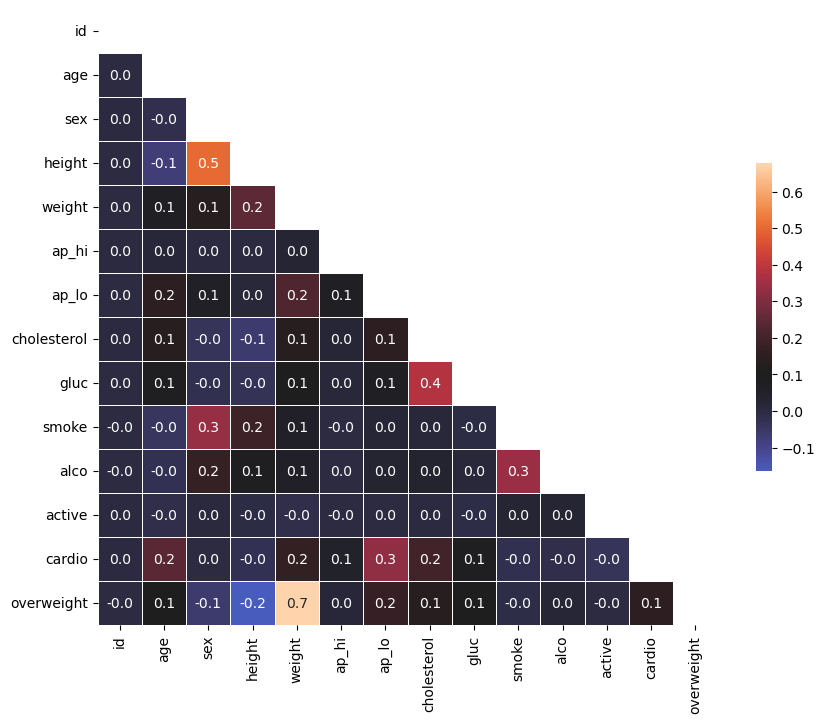

In [10]:
# Draw the heatmap with 'sns.heatmap()'

#Create a correlation matrix using the dataset. 
corr_df = clean_df.corr()

#Plot the correlation matrix using seaborn's heatmap(). 
#Mask the upper triangle. The chart should look like examples/Figure_2.png.
mask= np.triu(corr_df)

plt.figure(figsize=(10,8))
heatmap = sns.heatmap(corr_df, annot=True, mask=mask, cmap='icefire', center = 0.1, \
                          cbar_kws={'shrink': 0.5}, \
                          xticklabels=True, yticklabels=True, linewidths=0.5, linecolor='white', fmt= '.1f')


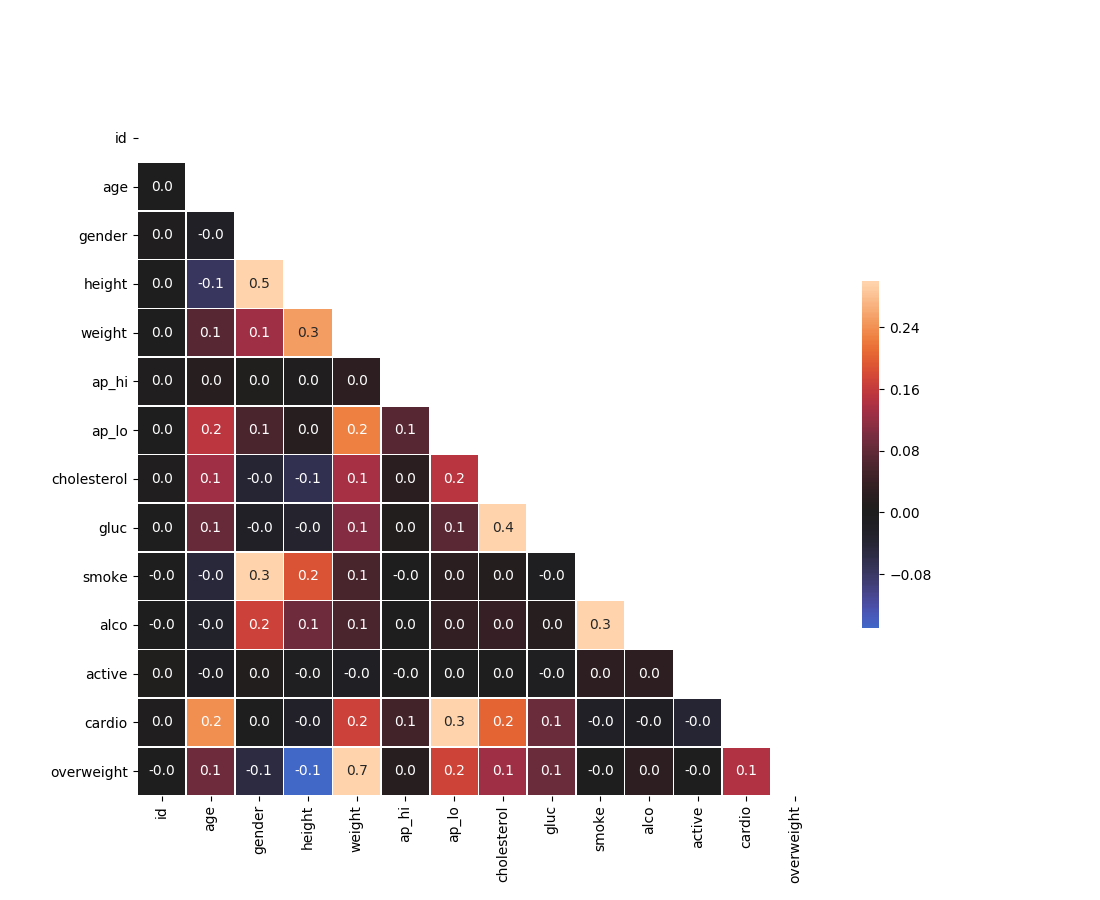

In [11]:
#Clean the data. Filter out the following patient segments that represent incorrect data:

#diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
#height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
#height is more than the 97.5th percentile
#weight is less than the 2.5th percentile
#weight is more than the 97.5th percentile

df = df.drop('BMI', axis=1)

# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi'])\
                    &(df['height'] >= df['height'].quantile(0.025))\
                    &(df['height'] <= df['height'].quantile(0.975))\
                    &(df['weight'] >= df['weight'].quantile(0.025))\
                    &(df['weight'] <= df['weight'].quantile(0.975))
                   ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(corr)
    #plt.figure(figsize=(10,8))

    # Set up the matplotlib figure
    fig, ax = plt.subplots()
    heatmap = sns.heatmap(corr, annot=True, mask=mask, cmap='icefire', center = 0.1, \
                          cbar_kws={'shrink': 0.5}, \
                          xticklabels=True, yticklabels=True, linewidths=0.5, linecolor='white', fmt= '.1f', ax=ax)


# Test Function

....
----------------------------------------------------------------------
Ran 4 tests in 0.536s

OK


['0.0', '0.0', '-0.0', '0.0', '-0.1', '0.5', '0.0', '0.1', '0.1', '0.3', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.2', '0.1', '0.0', '0.2', '0.1', '0.0', '0.1', '-0.0', '-0.1', '0.1', '0.0', '0.2', '0.0', '0.1', '-0.0', '-0.0', '0.1', '0.0', '0.1', '0.4', '-0.0', '-0.0', '0.3', '0.2', '0.1', '-0.0', '0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.2', '0.1', '0.1', '0.0', '0.0', '0.0', '0.0', '0.3', '0.0', '-0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.0', '0.0', '-0.0', '0.0', '0.0', '0.0', '0.2', '0.0', '-0.0', '0.2', '0.1', '0.3', '0.2', '0.1', '-0.0', '-0.0', '-0.0', '-0.0', '0.1', '-0.1', '-0.1', '0.7', '0.0', '0.2', '0.1', '0.1', '-0.0', '0.0', '-0.0', '0.1']


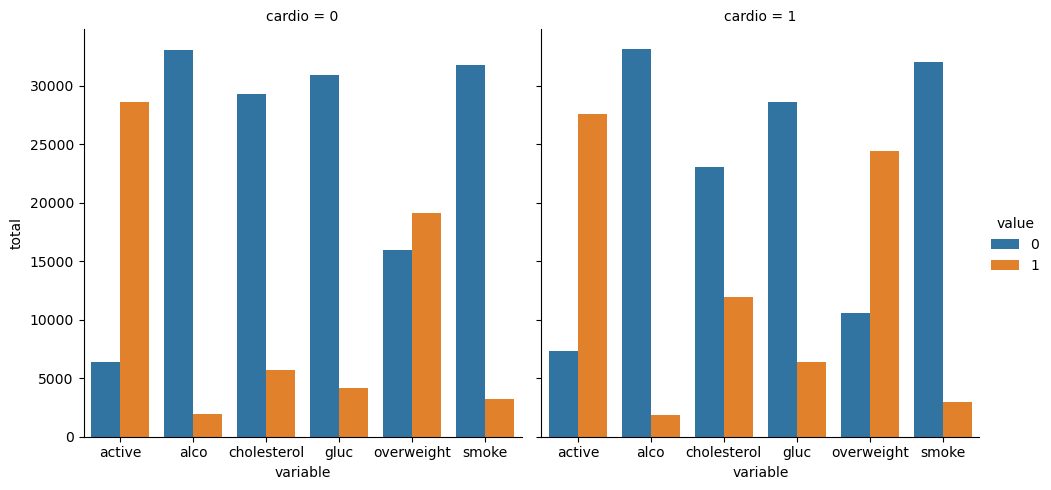

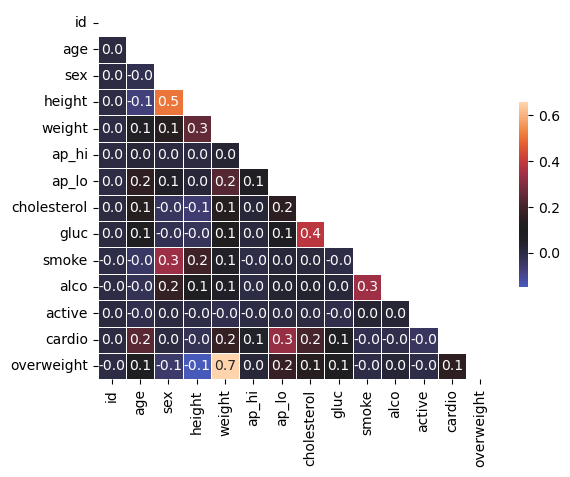

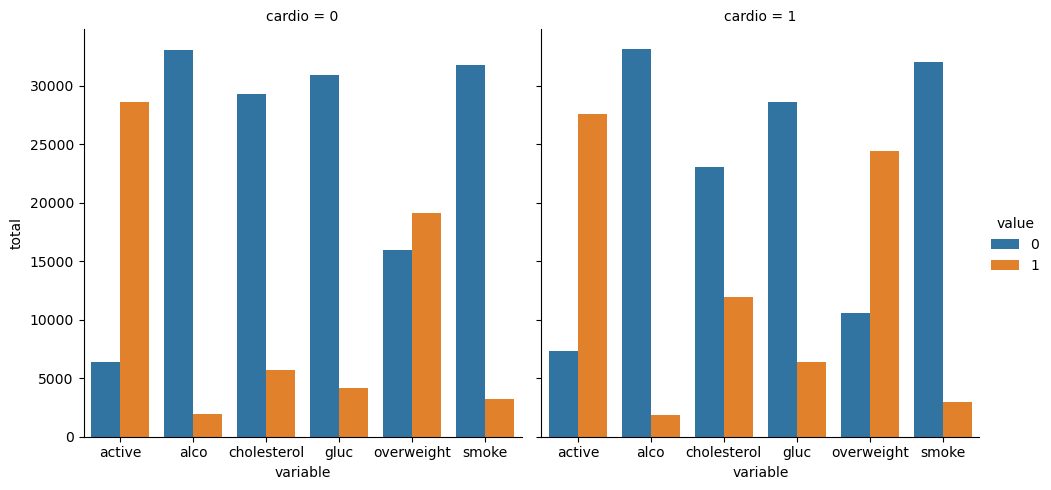

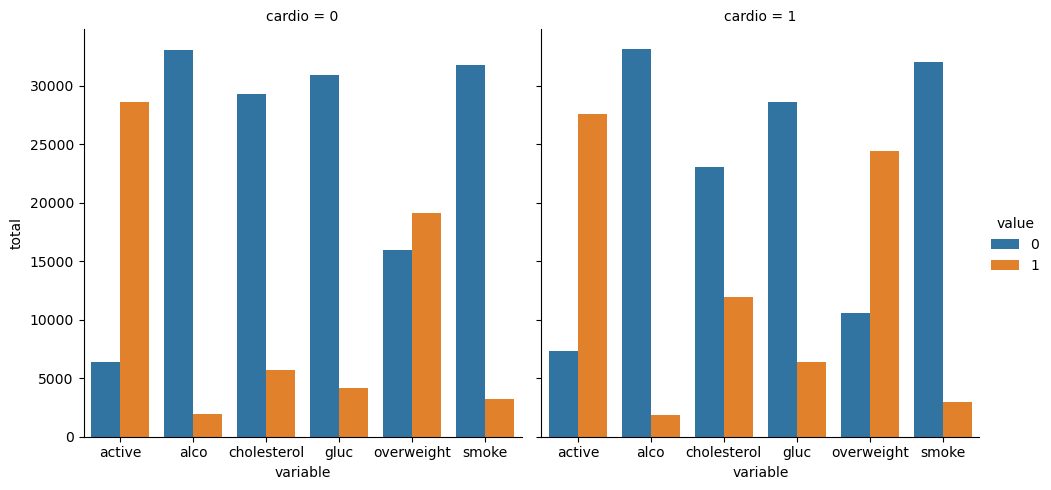

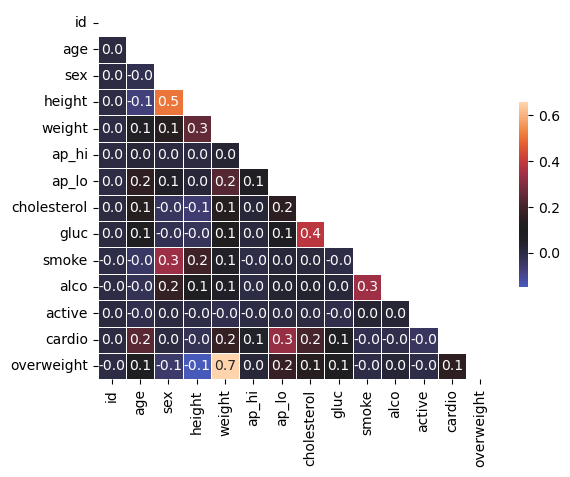

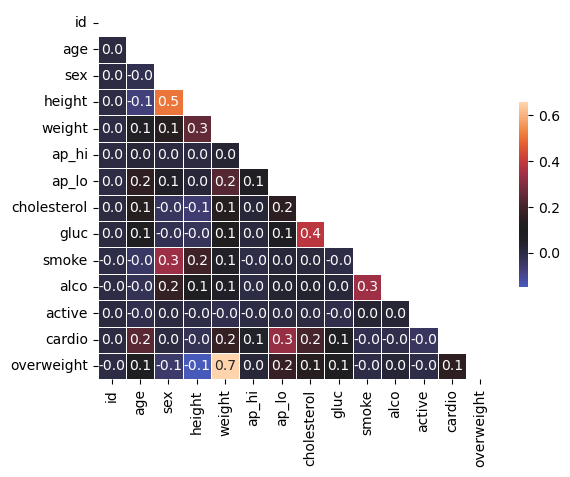

In [12]:
%run main.py